```{panels}
Voraussetzungen
^^^
- keine
---

Lerninhalte
^^^
- Einblick in die mathematische Modellierung
- Kritisches Hinterfragen von Modellannahmen
```

(traffic_motivation)=
# Das Stauproblem - Motivation zur Benutzung dieses Buches

Modellbildung und Simulation verbindet eine Vielzahl von Disziplinen, von grundlegender Mathematik über numerische Lösungsalgorithmen und Computernumerik hin zu der Syntax verschiedener Programmiersprachen. Dabei fällt es manchmal schwer, den Überblick zu behalten. Dieses Übungsbuch soll dabei helfen, die Modellbildung und Simulation durch ihre Schichten hindurch zu durchdringen und sie (be-)greifbar zu machen.

Als Beispiel hierfür nehmen wir uns eine Extremwertaufgabe vor. Diese spielen in der Praxis oft eine große Rolle.

## Aufgabenstellung

Angenommen das Schweizer Verkehrsministerium stellt eine Anfrage an Sie, die bestehenden Tempolimits Ihrer Autobahnen
zu überprüfen, unter dem konkreten Aspekt:

***"Wie können möglichst viele Fahrzeuge eine Engstelle, z.B. einen Tunnel passieren?"***

```{image} images/tunnel-wikimedia.jpg
:alt: "high v high s"
:width: 800px
:align: center
```
<div style="text-align: right"> Abbildung 1: "New Zealand - Homer Tunnel" <a href="https://commons.wikimedia.org/wiki/User:W._Bulach" >W. Bulach</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0/" >[CC BY-SA 4.0]</a> via <a href="https://commons.wikimedia.org/wiki/File:00_1365_New_Zealand_-_Homer_Tunnel_(Milford_Sound).jpg" >Wikimedia Commons</a></div> <br>

Nun ist Ihre Expertise gefragt!

## Extremwertaufgaben in fünf Akten

### 1. Parameterauswahl und Modellreduktion

Um diese Frage beantworten zu können, brauchen wir ein Modell. Aber welche *Größen* kommen dabei in Betracht? Zum Beispiel können wir uns fokussieren auf

- Länge und Geschwindigkeit der Fahrzeuge
- Zusammensetzung der Fahrzeugarten (PKW vs. LKW)
- Anzahl der Fahrspuren, Zu und Abfahrten
- Sichtverhältnisse, Fahrbahnbeschaffenheit
- (Sicherheits-) Abstand zwischen den Fahrzeugen
- ...und potentiell einige mehr.

Hierbei kommt die Frage auf: *Wie können alle Parameter in diesem Modell berücksichtigt werden?*

Das ist gar nicht unbedingt nötig, da ein Modell die
Natur aufs Nötig(st)e reduziert. Wir vereinfachen daher weiter auf ein mathematisch behandelbares Optimierungsproblem unter den Annahmen

- die Fahrbahn sei einspurig
- alle Fahrzeuge seien PKWs gleicher Länge
- alle Fahrzeuge fahren mit der gleichen Geschwindigkeit
- alle Fahrer:innen halten den gleichen Sicherheitsabstand ein

_Das ist für einen langen Tunnel in den Alpen nicht mal allzu unrealistisch..._

```{admonition} Hinweis
Dies entspricht dem **ersten Schritt** im Lösungsschema von Extremwertaufgaben: "Vereinfachtes Modell der Natur erstellen"
```

### 2. Mathematische Formulierung der Fragestellung

Was wir uns eigentlich fragen, ist: _Was ist besser...?_

1. Hohes Tempo und großer Sicherheitsabstand

```{image} images/highv_highs.png
:alt: "high v high s"
:width: 800px
:align: center
```

oder

2. Niedriges Tempo und kleiner Sicherheitsabstand

```{image} images/lowv_lows.png
:alt: "low v low s"
:width: 800px
:align: center
```

Um eine mathematische Funktion für unser Tunnel Modell aufstellen zu können, müssen wir nur noch etwas konkreter fragen:

***"Bei welcher Geschwindigkeit ist der Verkehrsfluss $F \left[\frac{\text{Fahrzeuge}}{\text{h}}\right]$, d.h. die Anzahl der passierenden Fahrzeuge pro Stunde, am größten?"***

Da wir das Modell bereits genügend vereinfacht haben, bleiben nur drei Variablen:

1. Geschwindigkeit $v \,\text{[m/s]}$
2. Abstand der Fahrzeuge $s \,\text{[m]}$
3. Fahrzeuglänge $L \,\text{[m]}$

```{image} images/trafficvariables.png
:alt: "traffic variables"
:width: 800px
:align: center
```

Diese können wir in eine mathematische Funktion für den Verkehrsfluss (in SI-Einheiten) überführen.

$$F = F(v,s,L) = \frac{v}{L+s}, F>0, F = \left[\frac{\text{Fahrzeuge}}{\text{s}}\right]$$

```{admonition} Hinweis
Dies entspricht dem **zweiten Schritt** im Schema zur Lösung von Extremwertaufgaben: "Die Ermittlung der Zielfunktion"
```

### 3. Konstruktion von Nebenbedingungen

Um die Gleichung besser lösen zu können, können wir _Nebenbedingungen_ konstruieren, welche die Variablen in Beziehung zueinander setzen:

1. Lege die Fahrzeuglänge $L$ als Konstante fest, z.B. $L=4.5 \text{ m}$.
2. Für den Sicherheitsabstand kennen wir aus der Fahrschule die Faustregeln:
- "Bremsweg-Regel" $s(v) = \frac{v}{10} \cdot \frac{v}{10} = \frac{v^2}{100}$
- "Tacho-Halbe-Regel" $s(v) = \frac{v}{2}$

Diese Regeln sind Faustregeln, bei denen die Einheiten als umgeformt angenommen werden. Daher formulieren wir sie in SI-Einheiten um:

- "Bremsweg-Regel" $s\left(v\,\left[\frac{\text{m}}{\text{s}}\right]\right) = \frac{(v\cdot 3.6\,\text{s})^2}{100\,\text{m}}$
- "Tacho-Halbe-Regel" $s\left(v\,\left[\frac{\text{m}}{\text{s}}\right]\right) = \frac{v\cdot 3.6\,\text{s}}{2}$

[//]: # (So müssen wir nur hinterher $F$ auf die Einheit $\left[\frac{\text{Fahrzeuge}}{\text{h}}\right]$ umrechnen.)

Mithilfe der "Bremsweg-Regel" und der konstanten Fahrzeuglänge vereinfachen wir die Funktion zu:

$$\max{F(v)} = \frac{v}{4.5\,\text{m} + \frac{(v\cdot 3.6\,\text{s})^2}{100\,\text{m}}}, v\in[0,\infty)$$

```{admonition} Hinweis
Dies entspricht dem **dritten Schritt** im Lösungsschema: "Eliminierung von Variablen durch Nebenbedingungen"
```

### 4. Mathematische Lösung des Modells

``` {admonition} Einschub: Definition und Sätze zu Extremwerten

*Definition*: Ein _lokales Maximum (Minimum)_ ist der Wert der Funktion $f$ an einer Stelle $x_0$, wenn in einer $\varepsilon$ Umgebung von $x_0$ die Funktion keine größeren (kleineren) Werte annimmt.

*Notwendige Bedingung für ein lokales Extremum:* Die differenzierbare Funktion $f$ besitzt in $x_0$ eine waagerechte Tangente, d.h. $f'(x_0)=0$.

*Hinreichende Bedingung für ein lokales Extremum:* Gilt für die mindestens zweimal differenzierbare Funktion $f$

1. $f'(x_0)=0$ und $f''(x_0)<0$, dann hat $f$ dort ein _lokales Maximum_.
2. $f'(x_0)=0$ und $f''(x_0)>0$, dann hat $f$ dort ein _lokales Minimum_.
```

Für die Gleichung setzen wir also $F' = 0$ und es muss gelten $F'' < 0$. <br>
Die Berechnung von $F'(v)$ finden Sie hier zum Aufklappen (Click to show)!

```{toggle}
$F'$ erhalten wir mit der Quotientenregel:

$$
\begin{align}
F'(v) &= \frac{\left(4.5\,\text{m} + \frac{(v\cdot 3.6\,\text{s})^2}{100\,\text{m}}\right) - v \cdot \frac{2\cdot v\cdot (3.6\,\text{s})^2}{100\,\text{m}}}{\left(4.5\,\text{m} + \frac{(v\cdot 3.6\,\text{s})^2}{100\,\text{m}}\right)^2} = 0 \\
&\Rightarrow 4.5 \,\text{m} + \frac{(3.6\,\text{s})^2}{100\,\text{m}} v^2 - \frac{(3.6\,\text{s})^2}{100\,\text{m}} 2v^2 = 0 \\
&\Rightarrow 4.5 \,\text{m} - \frac{(3.6\,\text{s})^2}{100\,\text{m}} v^2 = 0 \\
&\Rightarrow v^2 = \frac{4.5 \,\text{m}} {\frac{(3.6\,\text{s})^2}{100\,\text{m}}} \\
\end{align}
$$
```

Somit ergibt sich:

$$
\begin{align}
\Rightarrow v_{1/2} &= \pm \sqrt{\frac{450\,\text{m}^2}{(3.6\,\text{s})^2}} = \pm 5.89 \,\frac{\text{m}}{\text{s}}
\end{align}
$$

Die Berechnung von $F''(v)$ finden Sie hier ebenfalls zum Aufklappen!

```{toggle}
$F''$ erhalten wir ebenfalls mit der Quotientenregel und zusätzlich der Kettenregel:

$$
\begin{align}
F''(v) &= \frac{d}{dv} \left[ \frac{4.5 - \frac{(3.6)^2}{100} v^2 }{ \left(4.5 + \frac{(v\cdot 3.6)^2}{100}\right)^2 } \right]  \\
&= \frac{d}{dv} \left[ \frac{ 45000-1296 \cdot v^2 }{ (450+12.96 \cdot v^2)^2 }  \right]  \\
&= \frac{ -1296\cdot2v (450+12.96 v^2)^2 - (45000-1296 v^2) \cdot2 (450+12.96 v^2) \cdot 12.96 \cdot 2v }{ (450+12.96 v^2)^4 }  \\
&= \frac{-2592v (450+12.96 v^2) - (45000-1296 v^2) \cdot 51.84v }{ (450+12.96 v^2)^3 } \\
&= \frac{ -1166400v - 33592.32 v^3 - 2332800v + 67184.64 v^3 }{ (450+12.96 v^2)^3 } \\
&= \frac{ -3499200v + 33592.32 v^3 }{ (450+12.96 v^2)^3 } \\
\end{align}
$$

Somit ergibt sich: $F''(5.89) = -0.019$
```
<br>

Prüfung mit $F''(v_1)$ ($v_2$ liegt außerhalb des Definitionsbereichs) zeigt, dass für $v_1 = +5.89\,\frac{\text{m}}{\text{s}} = +21.21 \,\frac{\text{km}}{\text{h}}$ ein lokales Maximum vorliegt.

```{admonition} Hinweis
Dies entspricht dem **vierten Schritt** im Lösungsschema: "Bestimmung der lokalen Extremstellen"
```

### 5. Prüfung der Gültigkeit und Randstellen

Es bleiben noch zwei letzte Tests:

1. Liegt die oben errechnete Lösung im Definitionsbereich von $F$? $\rightarrow$ JA!
2. Am Rand des Definitionsbereichs könnten noch (globale) "Randextrama" liegen. Ist dies hier der Fall? $\rightarrow$ NEIN!

Das Ganze geht auch ganz einfach in Octave:

In [ ]:
F = @(V) -(V)./(4.5 + ((V*3.6).^2)/100); % set F as negative to be able to use minimize function
x = fminbnd (F, 0, 200)
Fmax = -F(x)

x = 5.8926
Fmax = 0.6547


```{admonition} Hinweis
Dies entspricht dem **fünften Schritt** im Lösungsschema: "Gültigkeits- und Randstellen Prüfung"
```

Damit erhalten wir die **Lösung**: Bei $v=21.21 \frac{\text{km}}{\text{h}}$ wird ein maximaler Fahrzeugdurchsatz von $F\left(21.21 \frac{\text{km}}{\text{h}}\right) = 0.6547 \frac{\text{Fahrzeuge}}{\text{s}} = 2357 \frac{\text{Fahrzeuge}}{\text{h}}$ erreicht.

## Physikalisches Know-How

Bevor wir die Ergebnisse an das Schweizer Verkehrsministerium übergeben, müssen wir zuletzt noch fragen: **Als wie realistisch schätzen wir diese Lösung ein?**

Dazu variieren wir die Faustformel für den Sicherheitsabstand zur "Tacho-Halbe-Regel". Daraus ergibt sich

$$F(v) = \frac{v}{4.5\,\text{m} + \frac{v\cdot 3.6 \,\text{s}}{2}}$$

$$F'(v) = \frac{\left(4.5\,\text{m} + \frac{v\cdot 3.6 \,\text{s}}{2}\right) - v \cdot \frac{3.6 \,\text{s}}{2}}{\left(4.5\,\text{m} + \frac{v\cdot 3.6 \,\text{s}}{2}\right)^2} = 0 \Rightarrow 4.5\,\text{m} = 0$$

$F$ hat also keine _lokalen Extrema_. Die Überprüfung der Randstellen liefert

1. $F(0)=0$
2. $\lim_{v\to\infty}{F(v)}=\lim_{v\to\infty}{\frac{v}{4.5\,\text{m} + \frac{v\cdot 3.6 \,\text{s}}{2}}} = 0.555 \frac{\text{Fahrzeuge}}{\text{s}} = 2000 \frac{\text{Fahrzeuge}}{\text{h}}$

Der Grenzwert bei 2. wird anhand der Regel von Bernoulli-L’Hospital berechnet.

In [ ]:
% graphische Darstellung von F(v) für beide Abstandsmodelle
graphics_toolkit("gnuplot")

vmax = 200;
dv = 1;
v = linspace(0,vmax,vmax*dv);
L = 4.5;
s_bremsweg = (v.^2)/100;
F_bremsweg = (1000*v)./(L + s_bremsweg);
s_tachohalbe = v/2;
F_tachohalbe = (1000*v)./(L + s_tachohalbe);

plot(v,F_bremsweg,"linewidth",1,v,F_tachohalbe,"linewidth",1)
xlabel ("Geschwindigkeit [km/h]");
ylabel ("Fahrzeugdurchsatz [Fahrzeuge/h]");

h = legend ("Bremsweg-Modell", "Tacho-Halbe-Modell");
legend (h, "location", "northeast");

<div style="text-align: right"> Abbildung 2: Fahrzeugdurchsatz in Fahrzeugen pro Stunde über Geschwindigkeit in Kilometer pro Stunde für das Bremsweg-Modell (blau) und das Tacho-Halbe-Modell (orange). </div> <br> 

Die Modelle liefern also sehr unterschiedliche Ergebnisse, mit denen wir noch nicht voll zufrieden sein können. Daraus ergibt sich die Frage:

***Können wir einfachen Mitteln zu einer deutlich realistischeren Beschreibung des Problems kommen?***

Die Antwort: Ja, durch etwas mehr Gehirnschmalz und Einsatz von ein wenig mehr Physik.

### Verbesserung des Modells

1. **Mehr Physik**\
Tatsächlich besteht der Anhalteweg u.a. aus dem Reaktionsweg und dem Bremsweg. Letzterer kann mit dem realen Beschleunigungsgesetz genauer berechnet werden: $s_\text{B} = \frac{v^2}{2\cdot a}$ (Verzögerung $a$ = _negative Beschleunigung_!)

2. **Mehr Gehirnschmalz**\
Bisher wird beim Sicherheitsabstand so getan, als ob im Bremsfall der Vorfahrende instantan von $v$ auf $0 \,\frac{\text{m}}{\text{s}}$ stoppt. Dessen Bremsweg $s_{\text{VF}} = \frac{v^2}{2\cdot a_{\text{VF}}}$ wird in der Fahrpraxis oft vom eigenen Bremsweg abgezogen.

```{image} images/Bremsvorgang.svg
:alt: "Quelle: Wikipedia"
:width: 600px
:align: center
```
<div style="text-align: right"> "Bremsvorgang", <a href="https://commons.wikimedia.org/wiki/User:Stefan-Xp" >Stefan-Xp</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0/legalcode" >[CC BY-SA 3.0]</a> via <a href="https://commons.wikimedia.org/wiki/File:Bremsvorgang.svg" >Wikimedia Commons</a></div> <br>

Wenn man beides berücksichtigt, ergibt sich mit Hilfe der Reaktionszeit $t_\text{R}$ und der Verzögerung $a$ als neuer Sicherheitsabstand $s$:

$$s = s(v,a_{\text{selbst}},a_{\text{VF}},t_\text{R})=v\cdot t_\text{R} + \frac{v^2}{2\cdot a_{\text{selbst}}} - \frac{v^2}{2\cdot a_{\text{VF}}}$$

Wieder müssen wir mit Nebenbedingungen (hier: Konstanten) das Problem vereinfachen:

1. $t_\text{R}=1 \text{ s}$
2. $a=30 \,\frac{\text{m}}{\text{s}^2}$

maxF = 0.6836
bestv = 20


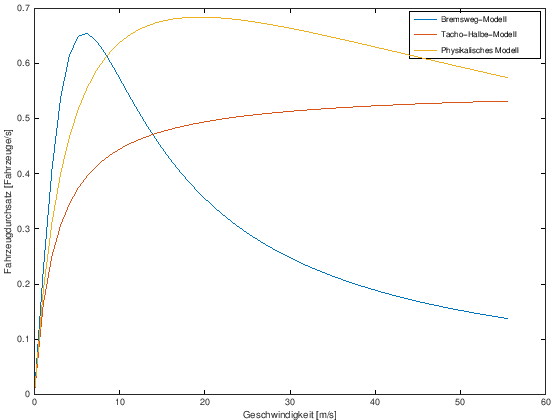

In [ ]:
% graphische Darstellung von F(v) für die drei Abstandsmodelle
graphics_toolkit("gnuplot")

vmax = 200/3.6;
dv = 1;
v = linspace(0,vmax,vmax*dv);
L = 4.5;
s_bremsweg = ((v*3.6).^2)/100;
F_bremsweg = v./(L + s_bremsweg);
s_tachohalbe = v*3.6/2;
F_tachohalbe = v./(L + s_tachohalbe);

t_R = 1;
a_selbst = 6;
a_VF = 7;
s_physik = v*t_R + v.^2/(2*a_selbst) - v.^2/(2*a_VF);
F_physik = v./(L + s_physik);

[maxF,bestv] = max(F_physik);
maxF
bestv = bestv/dv

plot(v,F_bremsweg,v,F_tachohalbe,v,F_physik)
xlabel ("Geschwindigkeit [m/s]");
ylabel ("Fahrzeugdurchsatz [Fahrzeuge/s]");

h = legend ("Bremsweg-Modell", "Tacho-Halbe-Modell", "Angepasstes Modell");
legend (h, "location", "northeast");

<div style="text-align: right"> Abbildung 3: Fahrzeugdurchsatz in Fahrzeugen pro Stunde über Geschwindigkeit in Kilometer pro Stunde für das Bremsweg-Modell (blau), das Tacho-Halbe-Modell (orange) und das angepasste Modell. </div> <br> 

Also wird bei $20\,\frac{\text{m}}{\text{s}} = 72 \,\frac{\text{km}}{\text{h}}$ der maximale Fahrzeugdurchsatz $F\left(v = 71 \,\frac{\text{km}}{\text{h}}\right) = 0.6836 \,\frac{\text{Fahrzeuge}}{\text{s}} = 2461 \,\frac{\text{Fahrzeuge}}{\text{h}}$ erreicht.

## Zusammenfassung

Das neue Modell kommt den tatsächlichen Tempolimits schon recht nahe. Damit könnte man dem Schweizer Verkehrsministerium durchaus Rat geben!

Das Lösen von solchen Extremwertaufgaben besteht also aus fünf Schritten, die wir alle hier kennengelernt haben:

1. Vereinfachtes Modell der Natur erstellen
2. Die Ermittlung der Zielfunktion
3. Eliminierung von Variablen durch Nebenbedingungen
4. Bestimmung der lokalen Extremstellen
5. Gültigkeits- und Randstellen-Prüfung

Außerdem haben wir eine wichtige Lektion gelernt:

***Für eine gute Simulation ist ein Bewusstsein für die Modellannahmen entscheidend.***

## Ausblick
In dieser Lösung sind natürlich einige Modellannahmen getroffen worden, die der Realität nicht standhalten, wie variierende Abstände und riskante Fahrweisen.

Ein sehr bekanntes Modell zur Verkehrssimulation ist das **Nagel-Schreckenberg-Modell**. Damit können Phänomene wie der "Stau-aus-dem-nichts" oder Knotennetze mit Kreuzungen und Ampelschaltungen einfach simuliert werden. Ein Beispiel dafür finden Sie in dem Kapitel {ref}`naschr` wieder.

Eine weitere Möglichkeit, Verkehr zu simulieren, ist mit **Partiellen Differentialgleichungen**. Diese lernen Sie in dem Kapitel {ref}`traffic_pde` kennen.